In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *
# keep track of time
import time

pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    atom1=Sodium(),
    atom2=Cesium(),
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 3, 15) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 10,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = True,  # whether to plot displacement histogram
)


### Initial testing

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s
Starting detuning scan...
  Point 2/15 - Elapsed: 0.1s, Est. remaining: 0.3s
  Point 4/15 - Elapsed: 0.1s, Est. remaining: 0.4s
  Point 6/15 - Elapsed: 0.3s, Est. remaining: 0.4s
  Point 8/15 - Elapsed: 0.4s, Est. remaining: 0.3s
  Point 10/15 - Elapsed: 0.5s, Est. remaining: 0.2s
  Point 12/15 - Elapsed: 0.6s, Est. remaining: 0.1s
  Point 14/15 - Elapsed: 0.7s, Est. remaining: 0.0s


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:606: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


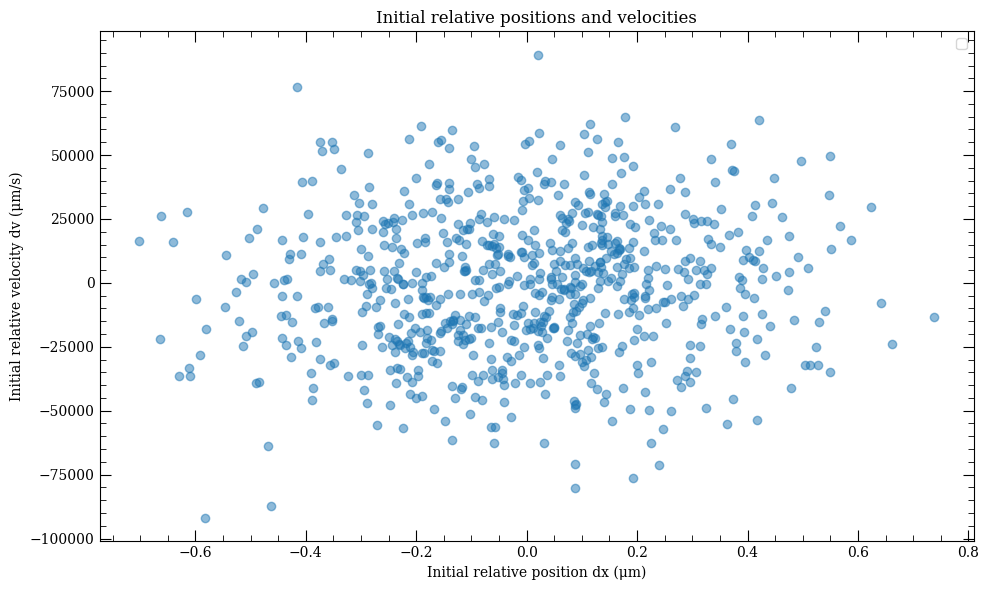

time for (A) with interaction: 0.9 s
Starting detuning scan...
  Point 2/15 - Elapsed: 0.0s, Est. remaining: 0.3s
  Point 4/15 - Elapsed: 0.1s, Est. remaining: 0.4s
  Point 6/15 - Elapsed: 0.2s, Est. remaining: 0.3s
  Point 8/15 - Elapsed: 0.3s, Est. remaining: 0.3s
  Point 10/15 - Elapsed: 0.4s, Est. remaining: 0.2s
  Point 12/15 - Elapsed: 0.5s, Est. remaining: 0.1s
  Point 14/15 - Elapsed: 0.6s, Est. remaining: 0.0s
time for (B) without interaction: 0.7 s
Starting detuning scan...
  Point 2/15 - Elapsed: 0.1s, Est. remaining: 0.3s
  Point 4/15 - Elapsed: 0.1s, Est. remaining: 0.4s
  Point 6/15 - Elapsed: 0.2s, Est. remaining: 0.4s
  Point 8/15 - Elapsed: 0.3s, Est. remaining: 0.3s
  Point 10/15 - Elapsed: 0.4s, Est. remaining: 0.2s
  Point 12/15 - Elapsed: 0.5s, Est. remaining: 0.1s
  Point 14/15 - Elapsed: 0.6s, Est. remaining: 0.0s
time for (C) without broadening: 0.7 s
Simulation done.


In [4]:
# ---------------------------------
# Main simulation
# ---------------------------------

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

# (B) without interaction
start_time = time.time()
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

print("Simulation done.")

Experiment Configuration:
  atom1: <arc.alkali_atom_data.Sodium object at 0x1740b5f90>
  mass_atom1: 3.81754100782179e-26
  n_atom1: 51
  l_atom1: 0
  j_atom1: 0.5
  m1: 0.5
  OMEGA_atom1_Hz: 500000.0
  T2_atom1_s: 5e-06
  atom2: <arc.alkali_atom_data.Cesium object at 0x3210ab390>
  mass_atom2: 2.206946954537107e-25
  n_atom2: 54
  l_atom2: 0
  j_atom2: 0.5
  m2: 0.5
  OMEGA_atom2_Hz: 0
  T2_atom2_s: 2e-05
  R_mean_um: 5.655
  R_axis_um: (1.0, 0.0, 0.0)
  t_wait_s: 0.0
  T1_use_ARC: True
  T_uK_atom1: (2.0, 2.0, 2.0)
  T_uK_atom2: (1.5, 1.5, 1.5)
  omega_trap_atom1_Hz: (230000.0, 230000.0, 37000.0)
  omega_trap_atom2_Hz: (100000.0, 100000.0, 20000.0)
  load_depth_T_atom1: 350
  load_depth_T_atom2: 100
  load_factor: 0.1
  Delta_scan_Hz: [-1000000.          -714285.71428571  -428571.42857143  -142857.14285714
   142857.14285714   428571.42857143   714285.71428571  1000000.
  1285714.28571429  1571428.57142857  1857142.85714286  2142857.14285714
  2428571.42857143  2714285.71428571  3000

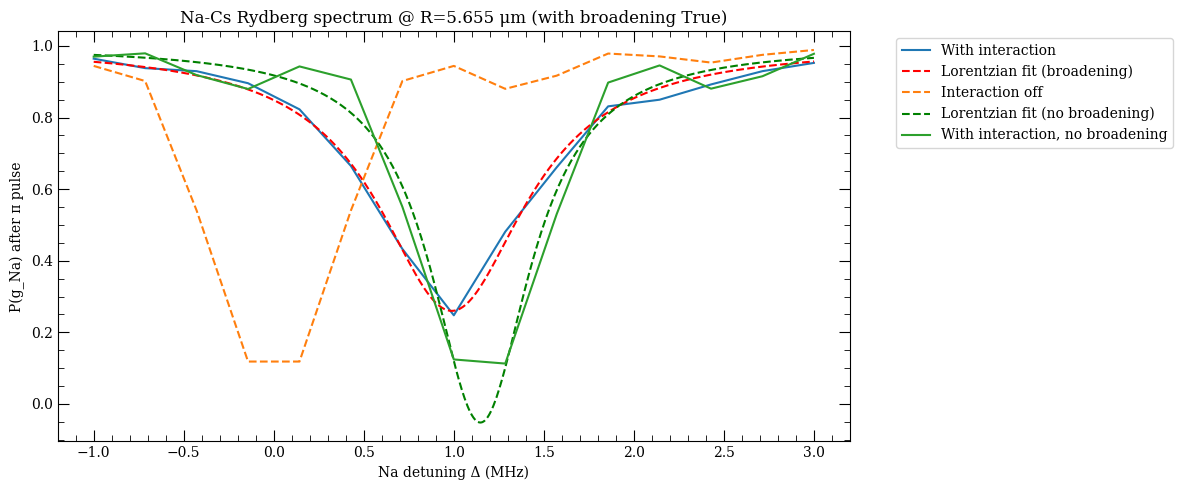

In [5]:
# plotting
if True:
    # print experiment configurations for reference
    print("Experiment Configuration:")
    for field_name, field_value in cfg.__dict__.items():
        print(f"  {field_name}: {field_value}")

print("---------------------------------")
# fit broadened data to Lorentzian
popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(broadening) \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
# fit non-broadened data to Lorentzian
popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(no broadening) \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")


plt.figure(figsize=(12,5))
plt.plot(d * 1e-6, P_int, label="With interaction")
# plot fitted Lorentzian
d_fit = np.linspace(min(d), max(d), 500)
plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "r--", label="Lorentzian fit (broadening)")
plt.plot(d * 1e-6, P_no, "--", label="Interaction off")
# plot fitted Lorentzian for no broadening
plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt_nb), "g--", label="Lorentzian fit (no broadening)")
plt.plot(d * 1e-6, P_no_broad, "-", label="With interaction, no broadening")
plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ R={cfg.R_mean_um} μm (with broadening {cfg.broadening})")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [9]:
print(len(cfg.positions_list))

750


ValueError: The 'color' keyword argument must have one color per dataset, but 3 datasets and 1 colors were provided

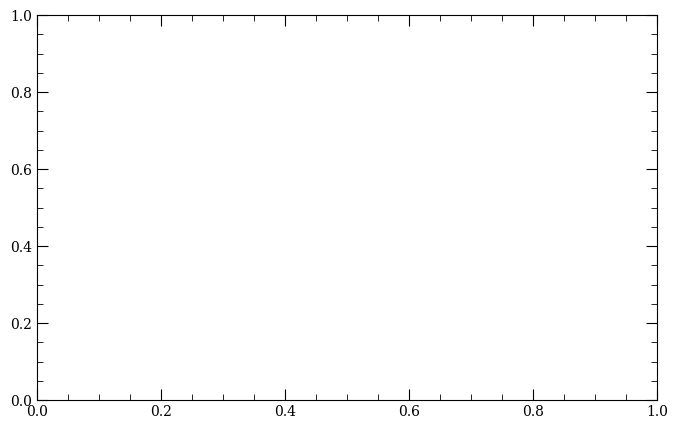

In [7]:
# plot displacement histogram.
pi_time = np.pi / (cfg.OMEGA_atom1_Hz * 2 * np.pi)
plt.figure(figsize=(8,5))
all_displacements = (cfg.R_mean_um + np.array(cfg.positions_list) + np.array(cfg.velocities_list) * pi_time)**6
plt.hist(all_displacements, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel("Interatomic distance |R|^6 (μm)")
plt.ylabel("Probability density")
plt.title("Histogram of interatomic distances during interaction")
plt.axvline((cfg.R_mean_um)**6, color='red', linestyle='--', label='Mean distance')
plt.legend()
plt.tight_layout()
plt.show()

## Sweeping the displacement for Na-Cs

### At finite temperature

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.8s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.7s, Est. remaining: 0.6s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.2s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.5s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.6s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.2s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.3s
  Point 8/30 - Elap

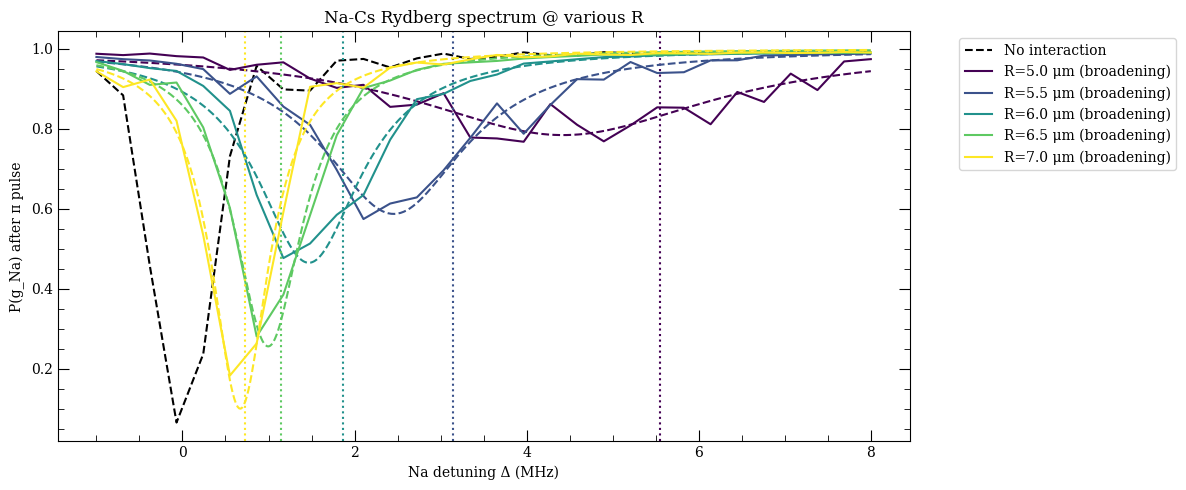

In [3]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### At Zero temperature, same sweep.

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.0s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.8s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.2s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.5s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.7s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.3s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.4s
  Point 8/30 - Elap

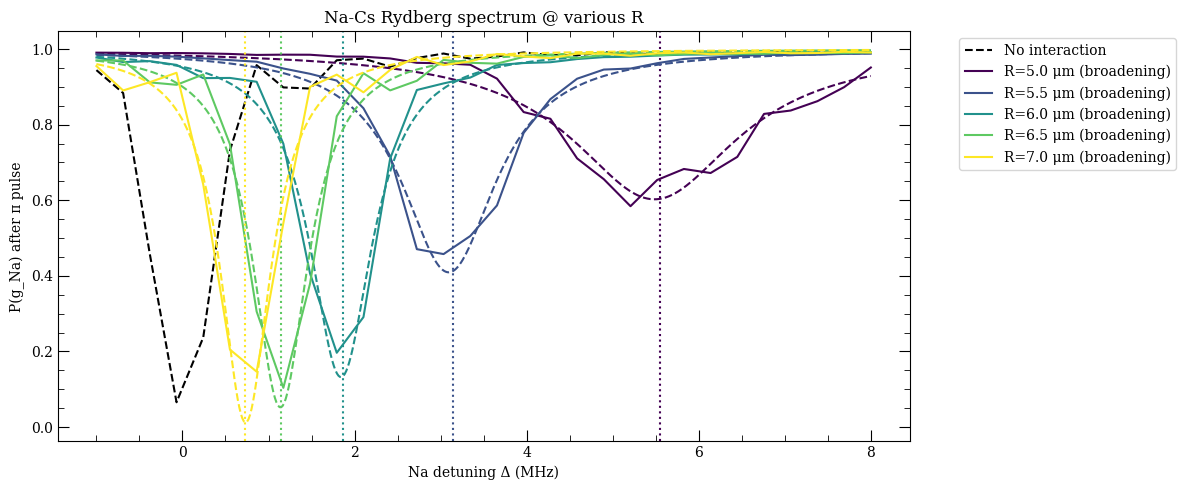

In [5]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Ground state for Cs ($T=0$) and Thermal state for Na ($T \ne 0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.8s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.5s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.7s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.3s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.3s
  Point 8/30 - Elap

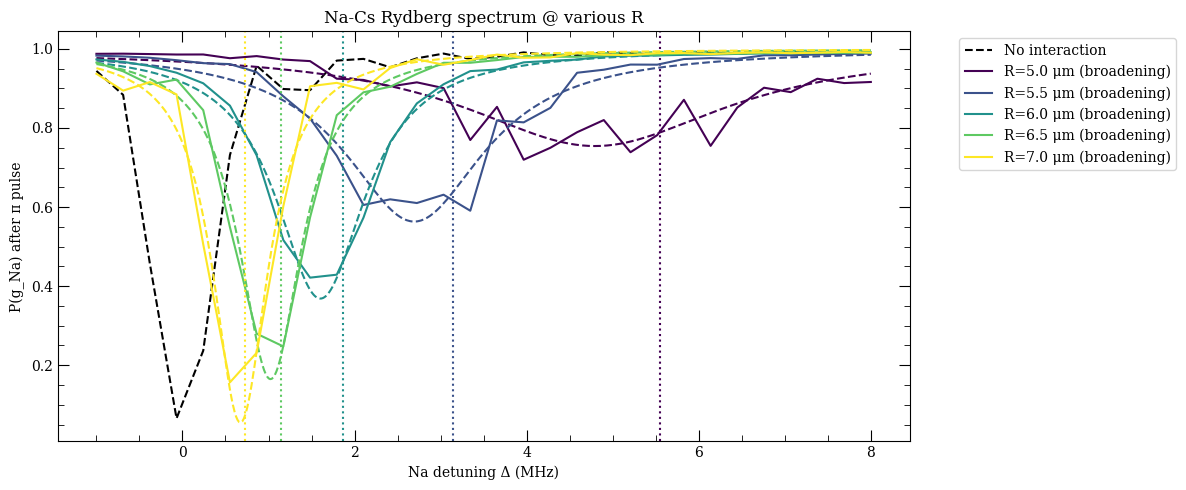

In [7]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Ground state for Na ($T=0$) and Thermal state for Cs ($T \ne 0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.8s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.5s, Est. remaining: 1.0s
  Point 12/30 - Elapsed: 0.6s, Est. remaining: 0.9s
  Point 14/30 - Elapsed: 0.7s, Est. remaining: 0.8s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.2s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.5s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.6s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.8s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.3s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.4s
  Point 8/30 - Elap

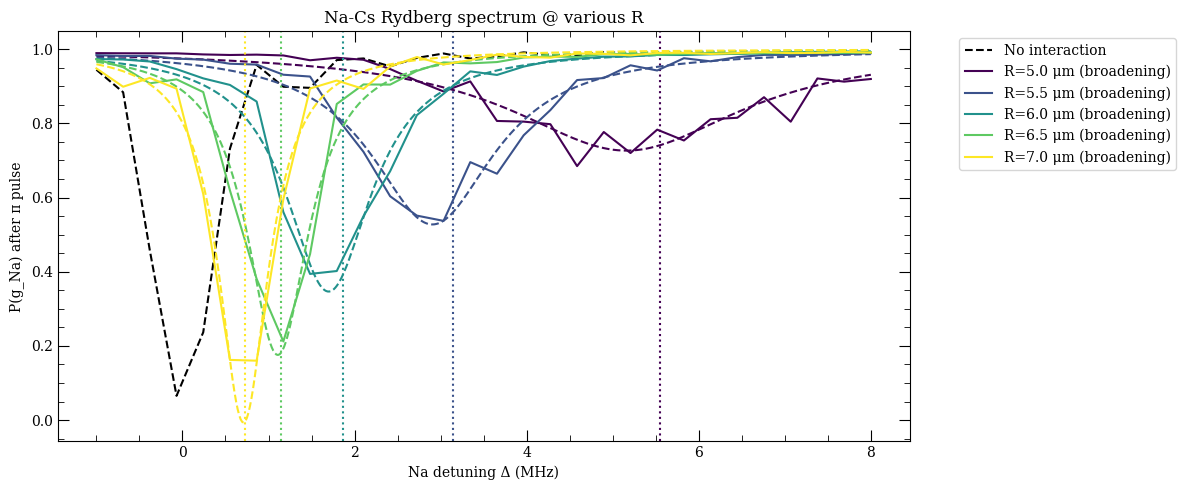

In [9]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Sweeping the displacement for Cs-Cs

### Finite temperature case ($T \ne 0$)

In [ ]:
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    # switch atom 1 to Cs
    atom1 = Cesium(),
    mass_atom1=Cesium().mass,
    n_atom1=54,
    wavelength_nm_atom1=1064, # tweezer wavelength for Cs atom1

    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 1.0e6,  # Cs Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-3, 12, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (1.0, 1.0, 1.0),
    T_uK_atom2 = (1.0, 1.0, 1.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (100e3, 100e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 100, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram

)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Cs 54S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Cs 54S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Cs 54S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Cs 54S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.8s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 1.0s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.7s, Est. remaining: 0.6s
  Point 18/30 - Elapsed: 0.8s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 0.9s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.0s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.2s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.3s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.4s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.5s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.2s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.3s
  Point 8/30 - Elap

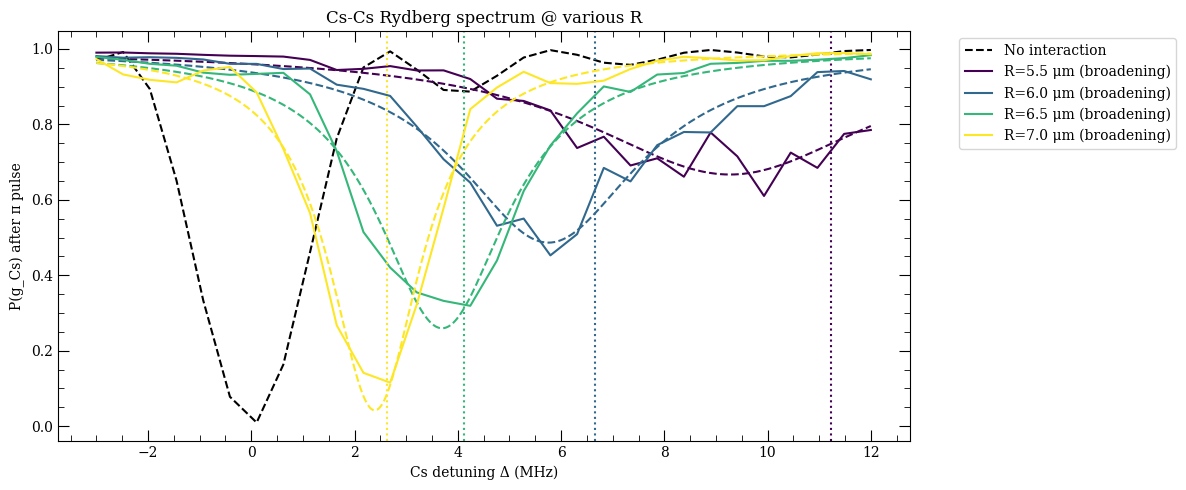

In [11]:
initial_dist_list = [5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Cs detuning Δ (MHz)")
plt.ylabel("P(g_Cs) after π pulse")
plt.title(f"Cs-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Zero temperature case ($T=0$)

In [ ]:
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    # switch atom 1 to Cs
    atom1 = Cesium(),
    mass_atom1=Cesium().mass,
    n_atom1=54,
    wavelength_nm_atom1=1064, # tweezer wavelength for Cs atom1
    
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 1.0e6,  # Cs Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-3, 12, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0),
    T_uK_atom2 = (0.0, 0.0, 0.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (100e3, 100e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 100, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram


)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Cs 54S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Cs 54S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Cs 54S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Cs 54S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.7s, Est. remaining: 0.6s
  Point 18/30 - Elapsed: 0.8s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 0.9s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.0s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.1s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.3s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.4s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.5s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.2s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.3s
  Point 8/30 - Elap

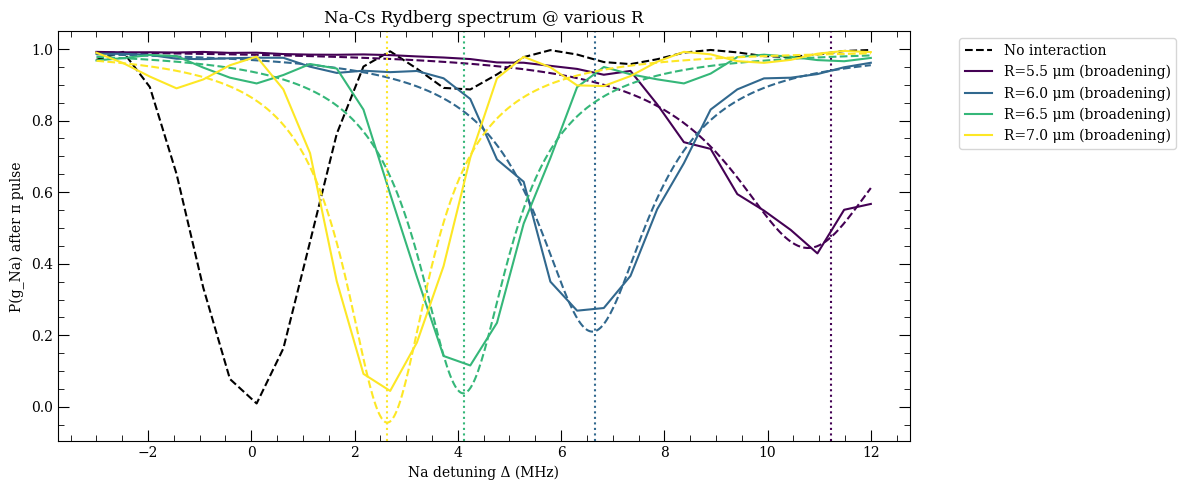

In [ ]:
initial_dist_list = [5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Cs detuning Δ (MHz)")
plt.ylabel("P(g_Cs) after π pulse")
plt.title(f"Cs-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Sweeping the displacement for Na-Na

### Finite temperature case ($T \ne 0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    atom1=Sodium(),
    mass_atom1=Sodium().mass,
    n_atom1=51,
    wavelength_nm_atom1=616.0,  # trapping wavelength for atom1 (nm)
    atom2=Sodium(),
    mass_atom2=Sodium().mass,
    n_atom2=51,
    wavelength_nm_atom2=616.0,  # trapping wavelength for atom2 (nm)

    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (2.0, 2.0, 2.0), # 2.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (230e3, 230e3, 37e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 5e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 350, # uK

    plot_displacements = False,  # whether to plot displacement histogram

)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Na 51S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Na 51S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -45.01738748147995 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.829e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 45.017 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.8s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.4s, Est. remaining: 1.1s
  Point 10/30 - Elapsed: 0.5s, Est. remaining: 1.0s
  Point 12/30 - Elapsed: 0.6s, Est. remaining: 0.9s
  Point 14/30 - Elapsed: 0.7s, Est. remaining: 0.8s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.1s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.2s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.5s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.6s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.8s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.3s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.3s
  Point 8/30 - Elap

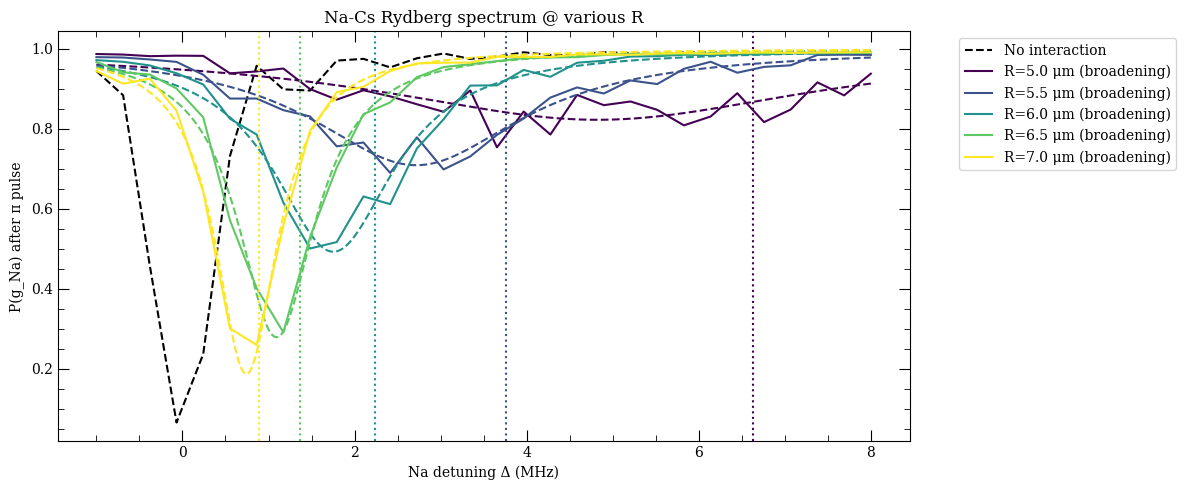

In [ ]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Na Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Zero temperature case ($T=0$)

In [19]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    atom1=Sodium(),
    mass_atom1=Sodium().mass,
    n_atom1=51,
    wavelength_nm_atom1=616.0,  # trapping wavelength for atom1 (nm)
    atom2=Sodium(),
    mass_atom2=Sodium().mass,
    n_atom2=51,
    wavelength_nm_atom2=616.0,  # trapping wavelength for atom2 (nm)

    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), # 2.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (230e3, 230e3, 37e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 5e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 350, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Na 51S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Na 51S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -45.01738748147995 GHz·μm^6
C6 (Na 51S - Na 51S) = 2.829e+11 rad/s·μm^6
C6 (Na 51S - Na 51S) = 45.017 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.8s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.5s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.7s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 1.1s
  Point 4/30 - Elapsed: 0.2s, Est. remaining: 1.5s
  Point 6/30 - Elapsed: 0.4s, Est. remaining: 1.5s
  Point 8/30 - Elap

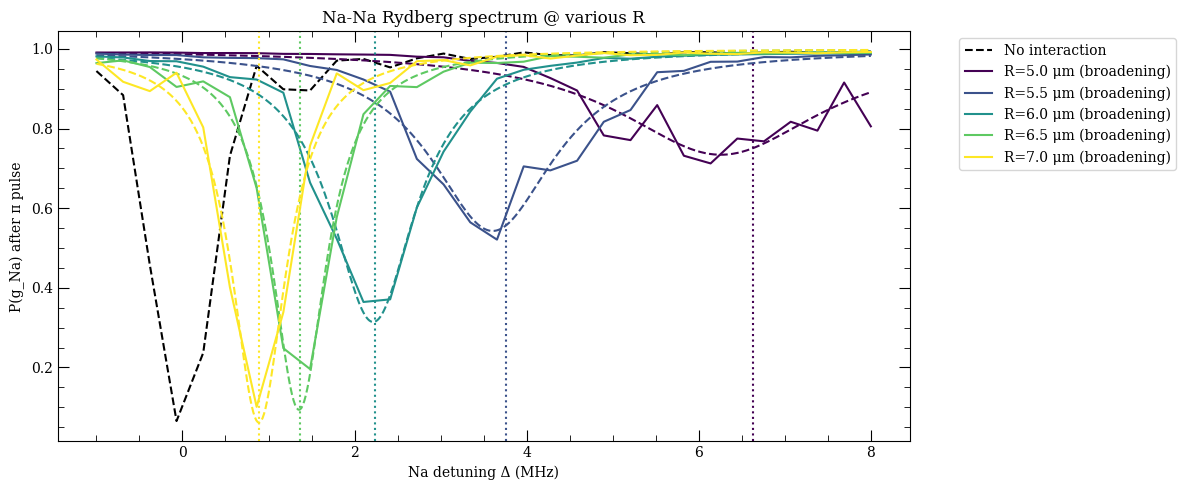

In [20]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Na Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Parking at one distance and sweeping the trap depth of both atoms. (finite temps)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# set experiemnt configuration to dedaults

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 5, 20) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution

    load_depth_T_atom1 = 350, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/20 - Elapsed: 0.1s, Est. remaining: 0.5s
  Point 4/20 - Elapsed: 0.1s, Est. remaining: 0.6s
  Point 6/20 - Elapsed: 0.2s, Est. remaining: 0.6s
  Point 8/20 - Elapsed: 0.4s, Est. remaining: 0.6s
  Point 10/20 - Elapsed: 0.5s, Est. remaining: 0.5s
  Point 12/20 - Elapsed: 0.6s, Est. remaining: 0.4s
  Point 14/20 - Elapsed: 0.7s, Est. remaining: 0.3s
  Point 16/20 - Elapsed: 0.8s, Est. remaining: 0.2s
  Point 18/20 - Elapsed: 0.9s, Est. remaining: 0.1s
  Point 20/20 - Elapsed: 1.1s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/20 - Elapsed: 0.0s, Est. remaining: 0.3s
  Point 4/20 - Elapsed: 0.1s, Est. remaining: 0.4s
  Point 6/20 - Elapsed: 0.2s, Est. remaining: 0.4s
  Point 8/20 - Elapsed: 0.2s, Est. remaining: 0.3s
  Point 10/20 - Elapsed: 0.3s, Est. remaining: 0.3s
  Point 12/20 - Elapsed: 0.3s, Est. remaining: 0.2s
  Point 14/20 - Elapsed: 0.4s, Est. remaining: 0.2s
  Point 16/20 - Elapsed: 0.4s, Est. remaining: 0.1s
  Point 18/20 - Elap

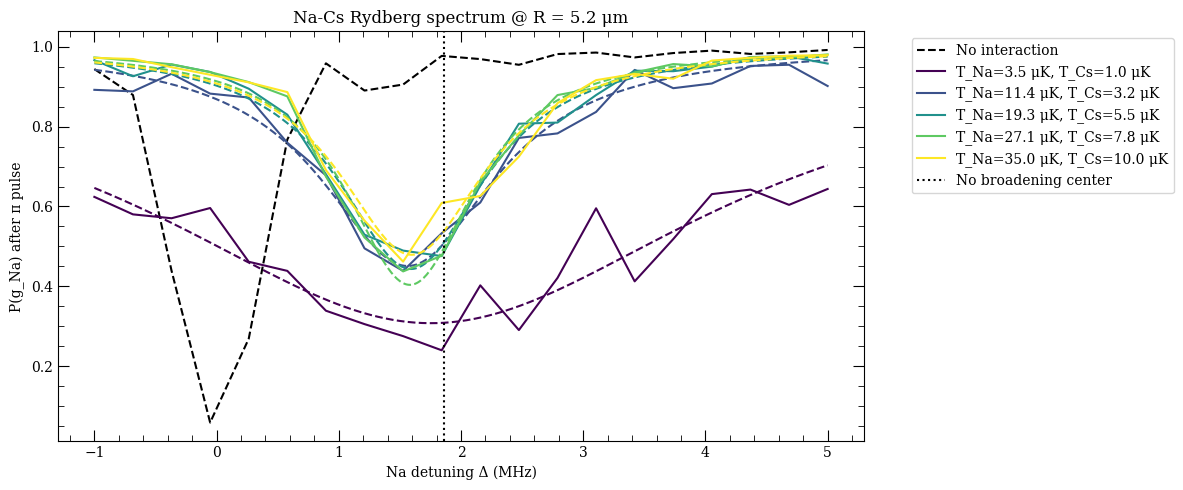

In [ ]:
sweep = np.linspace(0.01, 0.1, 5)
load_depths_Na = sweep * 350 # in uK
load_depths_Cs = sweep * 100 # in uK
temps_Na = np.sqrt(sweep) * 2 # in uK
temps_Cs = np.sqrt(sweep) * 1 # in uK
trap_freq_Na_radial = np.sqrt(sweep) * 230e3 # in Hz
trap_freq_Na_axial = np.sqrt(sweep) * 37e3 # in Hz
trap_freq_Cs_radial = np.sqrt(sweep) * 100e3 # in Hz
trap_freq_Cs_axial = np.sqrt(sweep) * 20e3 # in Hz

colors = plt.cm.viridis(np.linspace(0, 1, len(load_depths_Na)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for depth_Na, depth_Cs, color in zip(load_depths_Na, load_depths_Cs, colors):
    cfg.load_depth_T_atom1 = depth_Na
    cfg.load_depth_T_atom2 = depth_Cs

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    # print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)

# (B) with interaction + no broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
# fit non-broadened data to Lorentzian
popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(no broadening) T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
# print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
center = popt_nb[1] # find the center from no broadening fit for plotting

# plot the line at center from no broadening
plt.axvline(center*1e-6, linestyle=':', color='black', label="No broadening center")

print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ R = {cfg.R_mean_um:.1f} μm")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
if True:
    # print experiment configurations for reference
    print("Experiment Configuration:")
    for field_name, field_value in cfg.__dict__.items():
        print(f"  {field_name}: {field_value}")

Experiment Configuration:
  atom1: <arc.alkali_atom_data.Sodium object at 0x104b6a650>
  mass_atom1: 3.81754100782179e-26
  n_atom1: 51
  l_atom1: 0
  j_atom1: 0.5
  m1: 0.5
  OMEGA_atom1_Hz: 500000.0
  T2_atom1_s: 5e-06
  wavelength_nm_atom1: 616.0
  atom2: <arc.alkali_atom_data.Cesium object at 0x104b6a520>
  mass_atom2: 2.206946954537107e-25
  n_atom2: 54
  l_atom2: 0
  j_atom2: 0.5
  m2: 0.5
  OMEGA_atom2_Hz: 0
  T2_atom2_s: 2e-05
  wavelength_nm_atom2: 1064.0
  R_mean_um: 5.22
  R_axis_um: (1.0, 0.0, 0.0)
  t_wait_s: 0.0
  T1_use_ARC: True
  T_uK_atom1: (2.0, 2.0, 2.0)
  T_uK_atom2: (1.5, 1.5, 1.5)
  omega_trap_atom1_Hz: (230000.0, 230000.0, 37000.0)
  omega_trap_atom2_Hz: (100000.0, 100000.0, 20000.0)
  load_depth_T_atom1: 350.0
  load_depth_T_atom2: 100.0
  load_factor: 0.1
  Delta_scan_Hz: [-1000000.          -684210.52631579  -368421.05263158   -52631.57894737
   263157.89473684   578947.36842105   894736.84210526  1210526.31578947
  1526315.78947368  1842105.26315789  2157894

## Simulate release recaputure

In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *
# keep track of time
import time

### Na

In [ ]:
# set a single detuning value (far away from interaction) and sweep the pulse time (rabi frequency) of atom 1
cfg = ExperimentConfig(
    R_mean_um = 6.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0.0,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    t_pi_atom1_us = 1.0, # pulse time for atom 1 (us)

    Delta_scan_Hz = np.array([1e6]), # single detuning value (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (1.0, 1.0, 1.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = 0.05,#np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution
    load_depth_T_atom1 = 1000, # uK
    load_depth_T_atom2 = 100, # uK
    plot_displacements = False,  # whether to plot displacement histogram
    
    # simulate recapture for atom 1 only (Na)
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=False,
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

if True:
    # print experiment configurations for reference
    print("Experiment Configuration:")
    for field_name, field_value in cfg.__dict__.items():
        print(f"  {field_name}: {field_value}")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s
Experiment Configuration:
  atom1: <arc.alkali_atom_data.Sodium object at 0x30f921640>
  mass_atom1: 3.81754100782179e-26
  n_atom1: 51
  l_atom1: 0
  j_atom1: 0.5
  m1: 0.5
  OMEGA_atom1_Hz: 0.0
  T2_atom1_s: 5e-06
  wavelength_nm_atom1: 616.0
  atom2: <arc.alkali_atom_data.Cesium object at 0x113b39160>
  mass_atom2: 2.206946954537107e-25
  n_atom2: 54
  l_atom2: 0
  j_atom2: 0.5
  m2: 0.5
  OMEGA_atom2_Hz: 0
  T2_atom2_s: 2e-05
  wavelength_nm_atom2: 1064.0
  R_mean_um: 5.22
  R_axis_um: (1.0, 0.0, 0.0)
  t_pi_atom1_us: 1.0
  t_wait_s: 0.0
  T1_use_ARC: True
  T_uK_atom1: (1.0, 1.0, 1.0)
  T_uK_atom2: (1.0, 1.0, 1.0)
  omega_trap_atom1_Hz: (230000.0, 230000.0, 37000.0)
  omega_trap_atom2_Hz: (100000.0, 100000.0, 20000.0)
  load_depth_T_atom1: 1000
  load_depth_T_atom2: 100
  load_factor: 0.05
  Delta_scan_Hz: [1000000.]
  broadenin

In [37]:
w0 = (cfg.omega_trap_atom1_Hz[0] / cfg.omega_trap_atom1_Hz[2]) * cfg.wavelength_nm_atom1*1e-9 / (np.pi * np.sqrt(2))
print(w0*1e6)

w0 = (cfg.omega_trap_atom2_Hz[0] / cfg.omega_trap_atom2_Hz[2]) * cfg.wavelength_nm_atom2*1e-9 / (np.pi * np.sqrt(2))
print(w0*1e6)

0.8618703761698567
1.1974207004889514


In [50]:
# sweep over pulse times (Rabi frequencies)
pulse_times_us_Na = np.linspace(1, 100, 20)  # in microseconds
colors = plt.cm.viridis(np.linspace(0, 1, len(pulse_times_us_Na)))
# rabi_freqs_Hz = (np.pi / (2 * (pulse_times_us_Na * 1e-6)))  # in Hz
pop_array_Na = []
for pulse_time, color in zip(pulse_times_us_Na, colors):
    cfg.t_pi_atom1_us = pulse_time

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

    pop_array_Na.append(P_int[0])  # only one detuning point

Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction

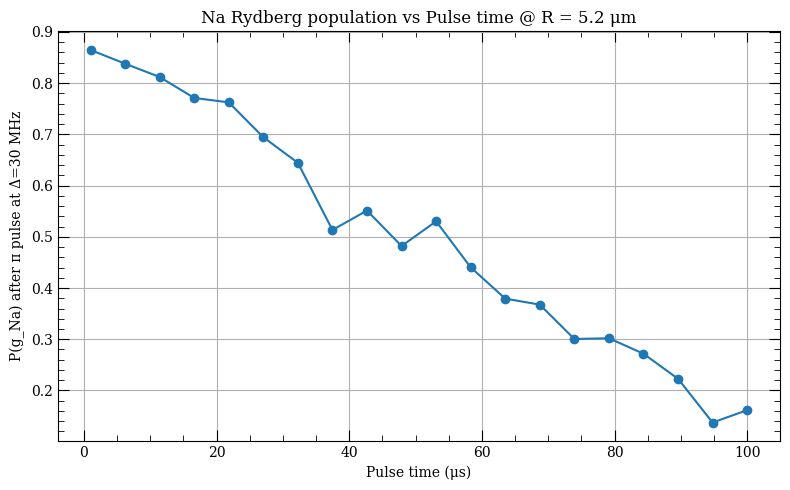

In [51]:
# plot pulse time vs population
plt.figure(figsize=(8,5))
plt.plot(pulse_times_us_Na, np.array(pop_array_Na)*0.87, "o-")
plt.xlabel("Pulse time (μs)")
plt.ylabel("P(g_Na) after π pulse at Δ=30 MHz")
plt.title(f"Na Rydberg population vs Pulse time @ R = {cfg.R_mean_um:.1f} μm")
# set x-axis to log scale
# plt.xscale("log")
plt.grid()
plt.tight_layout()
plt.show()

### For Cs

In [12]:
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# set a single detuning value (far away from interaction) and sweep the pulse time (rabi frequency) of atom 1
cfg = ExperimentConfig(
    R_mean_um = 6.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0.0,  # Na Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg
    t_pi_atom1_us=1.0, # pulse time for atom 1 (us)
    
    Delta_scan_Hz = np.array([1e6]), # single detuning value (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (1.0, 1.0, 1.0), # 2.0
    T_uK_atom2 = (1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping

    T2_atom1_s = 5e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 500,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution
    load_depth_T_atom1 = 1000, # uK
    load_depth_T_atom2 = 100, # uK
    plot_displacements = False,  # whether to plot displacement histogram

    # simulate recapture for atom 2 only (Cs)
    simulate_atom1_recapture=False,
    simulate_atom2_recapture=True,
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

if True:
    # print experiment configurations for reference
    print("Experiment Configuration:")
    for field_name, field_value in cfg.__dict__.items():
        print(f"  {field_name}: {field_value}")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s
Experiment Configuration:
  atom1: <arc.alkali_atom_data.Sodium object at 0x16e30b100>
  mass_atom1: 3.81754100782179e-26
  n_atom1: 51
  l_atom1: 0
  j_atom1: 0.5
  m1: 0.5
  OMEGA_atom1_Hz: 0.0
  T2_atom1_s: 5e-06
  wavelength_nm_atom1: 616.0
  atom2: <arc.alkali_atom_data.Cesium object at 0x16e30b820>
  mass_atom2: 2.206946954537107e-25
  n_atom2: 54
  l_atom2: 0
  j_atom2: 0.5
  m2: 0.5
  OMEGA_atom2_Hz: 0
  T2_atom2_s: 2e-05
  wavelength_nm_atom2: 1064.0
  R_mean_um: 4.0200000000000005
  R_axis_um: (1.0, 0.0, 0.0)
  t_pi_atom1_us: 1.0
  t_wait_s: 0.0
  T1_use_ARC: True
  T_uK_atom1: (1.0, 1.0, 1.0)
  T_uK_atom2: (1.0, 1.0, 1.0)
  omega_trap_atom1_Hz: (230000.0, 230000.0, 37000.0)
  omega_trap_atom2_Hz: (100000.0, 100000.0, 20000.0)
  load_depth_T_atom1: 1000
  load_depth_T_atom2: 100
  load_factor: 0.1
  Delta_scan_Hz: [1000000.

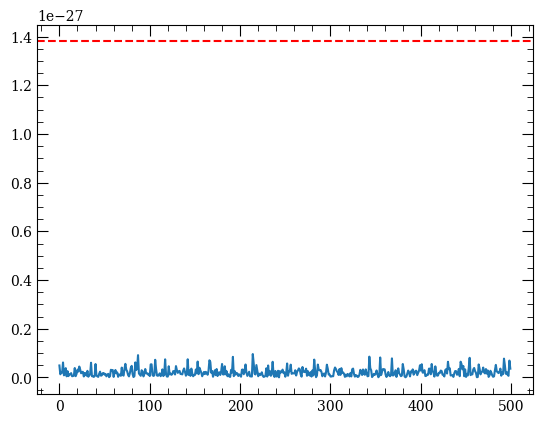

In [24]:
plt.plot([i[0] for i in cfg.energy_array2])
plt.axhline(cfg.energy_array2[0][2], color='r', linestyle='--')

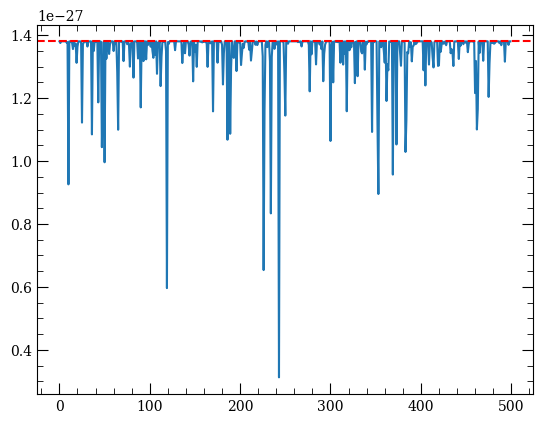

In [23]:
plt.plot([i[1] for i in cfg.energy_array2])
plt.axhline(cfg.energy_array2[0][2], color='r', linestyle='--')

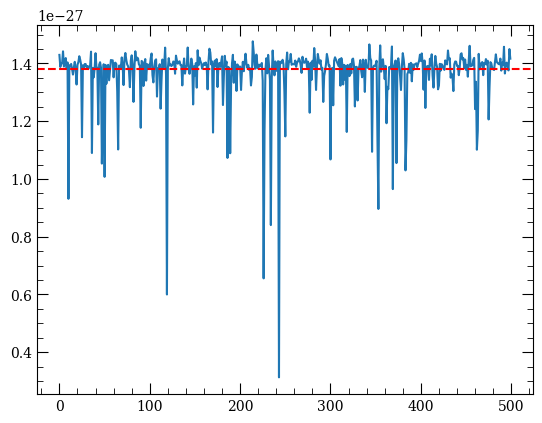

In [25]:
plt.plot(np.array([i[0] for i in cfg.energy_array2]) + np.array([i[1] for i in cfg.energy_array2]))
plt.axhline(cfg.energy_array2[0][2], color='r', linestyle='--')

Starting detuning scan...
time for (A) with interaction: 0.7 s


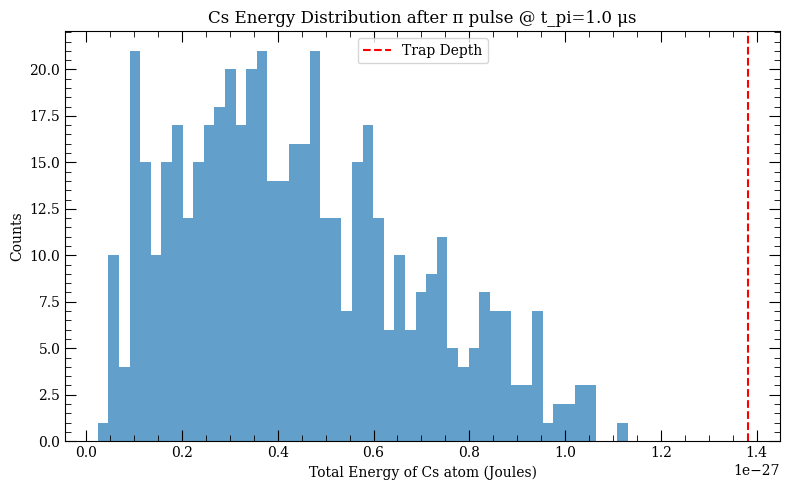

Starting detuning scan...
time for (A) with interaction: 0.8 s


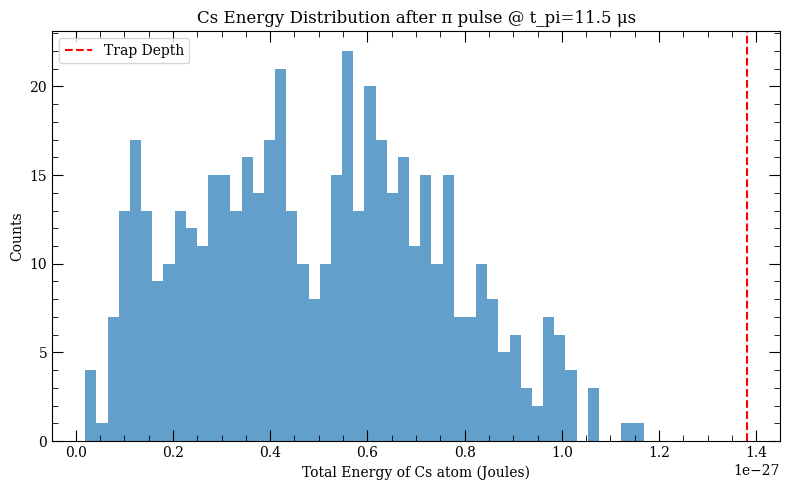

Starting detuning scan...
time for (A) with interaction: 0.7 s


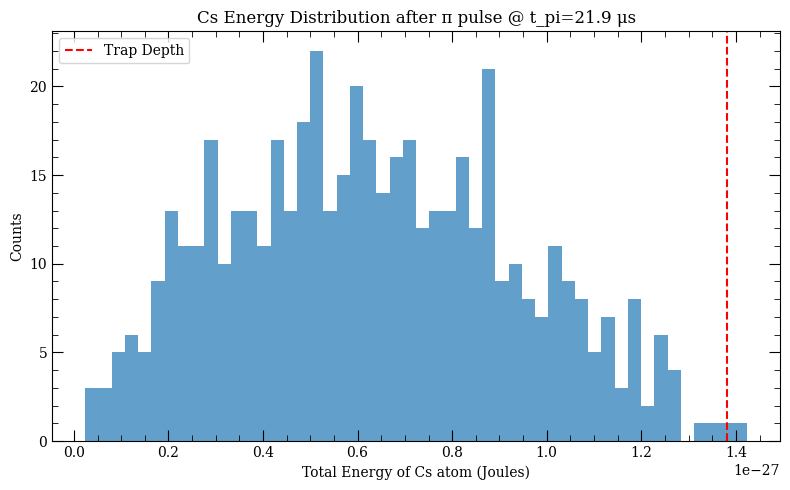

Starting detuning scan...
time for (A) with interaction: 0.7 s


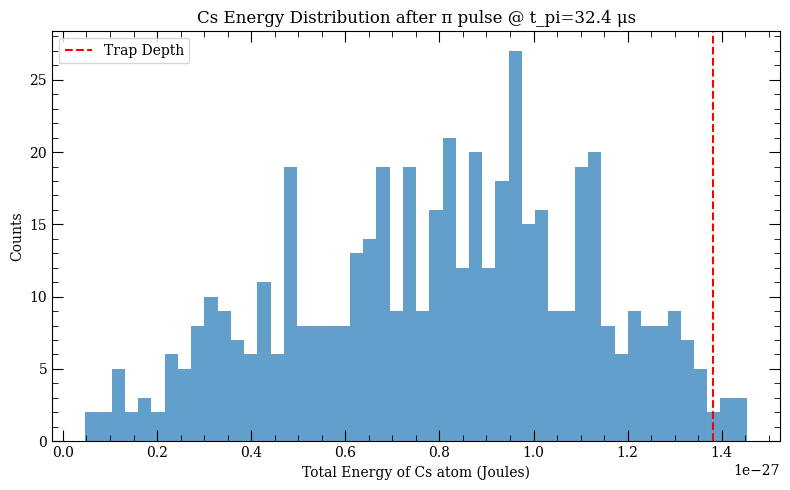

Starting detuning scan...
time for (A) with interaction: 0.7 s


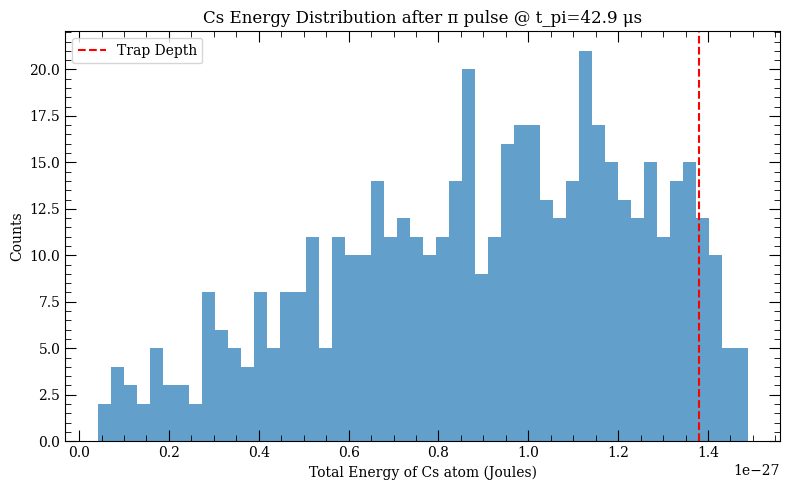

Starting detuning scan...
time for (A) with interaction: 0.7 s


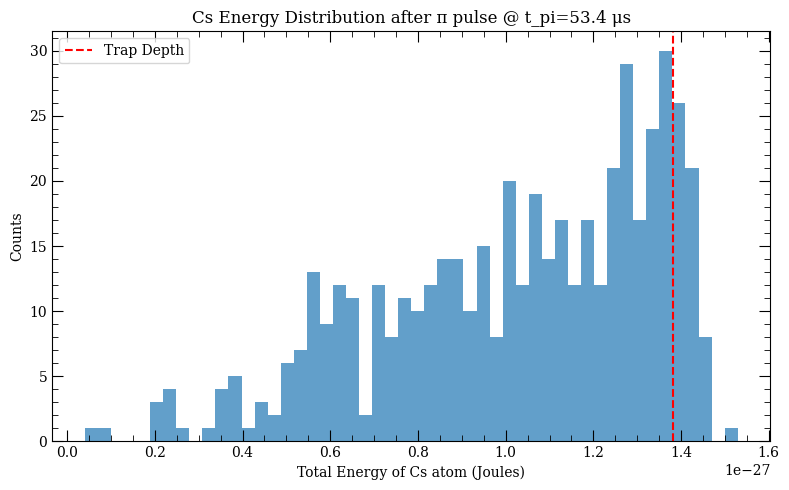

Starting detuning scan...
time for (A) with interaction: 0.6 s


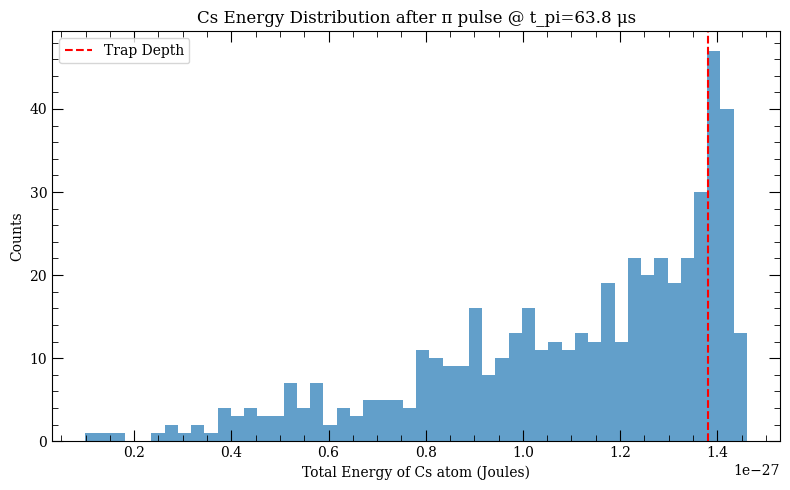

Starting detuning scan...
time for (A) with interaction: 0.5 s


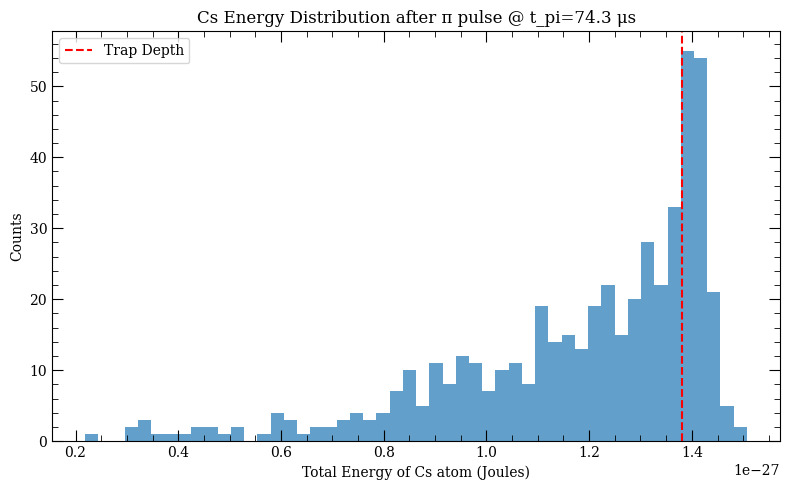

Starting detuning scan...
time for (A) with interaction: 0.5 s


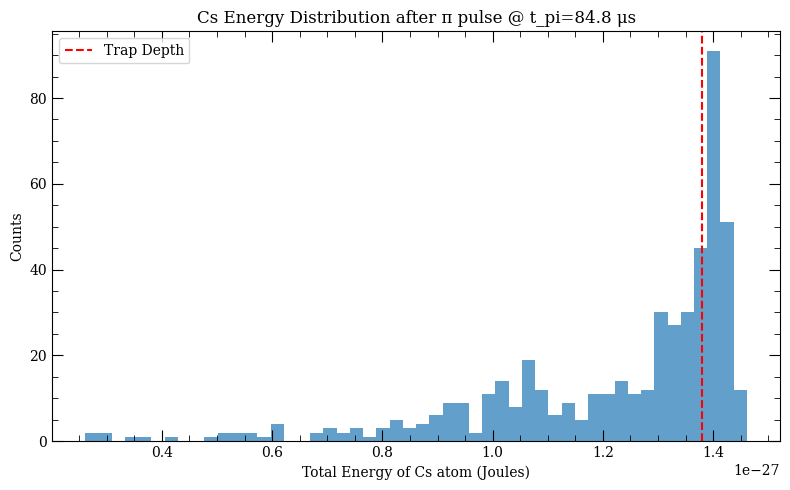

Starting detuning scan...
time for (A) with interaction: 0.5 s


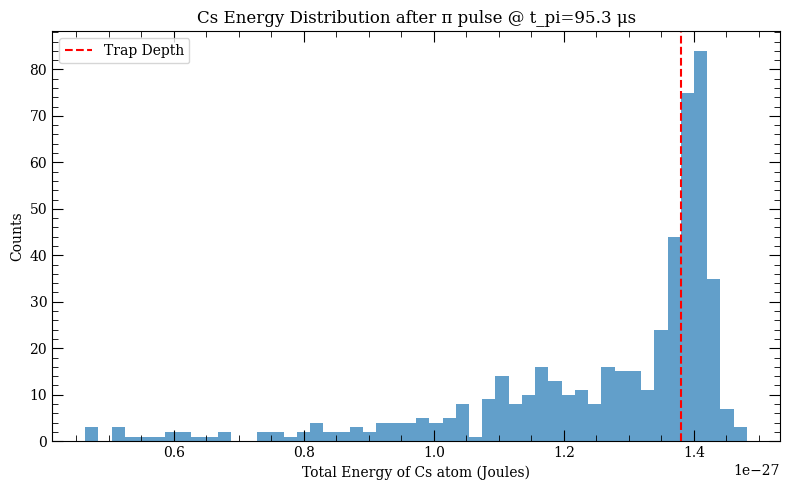

Starting detuning scan...
time for (A) with interaction: 0.4 s


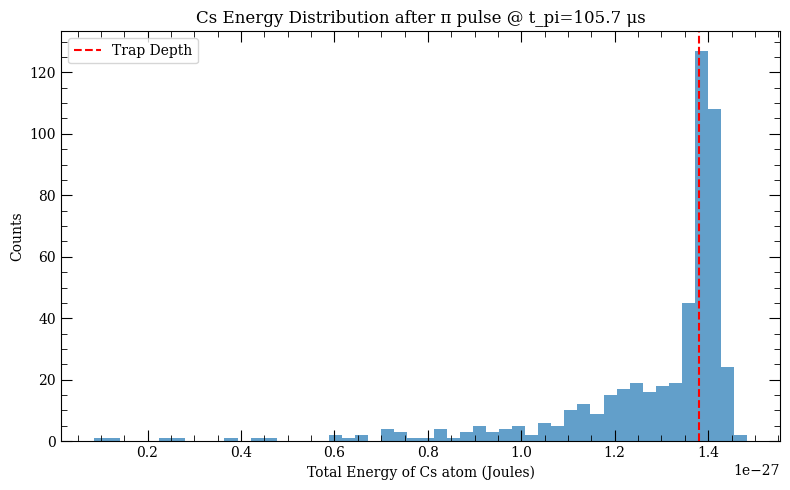

Starting detuning scan...
time for (A) with interaction: 0.4 s


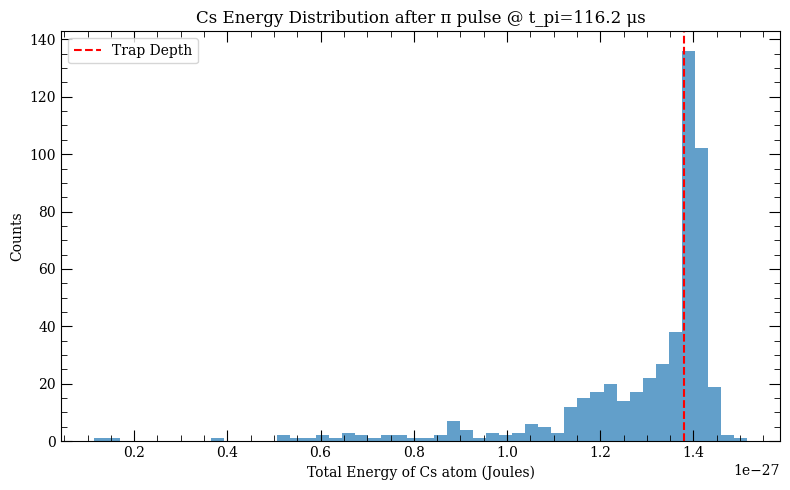

Starting detuning scan...
time for (A) with interaction: 0.4 s


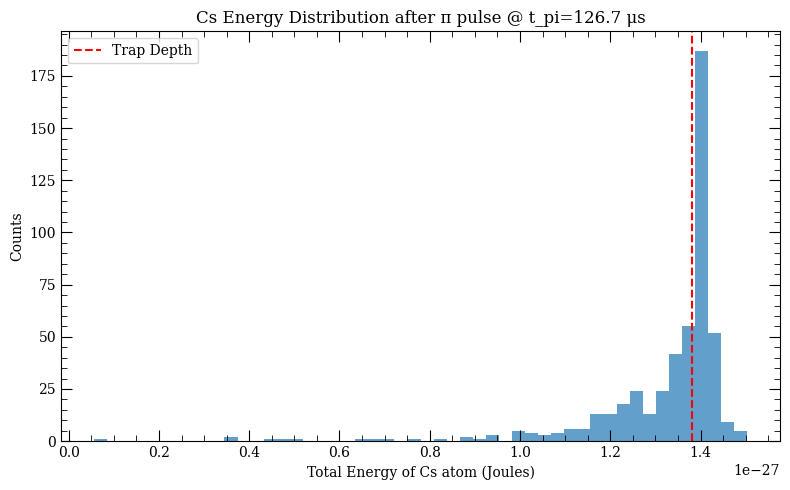

Starting detuning scan...
time for (A) with interaction: 0.4 s


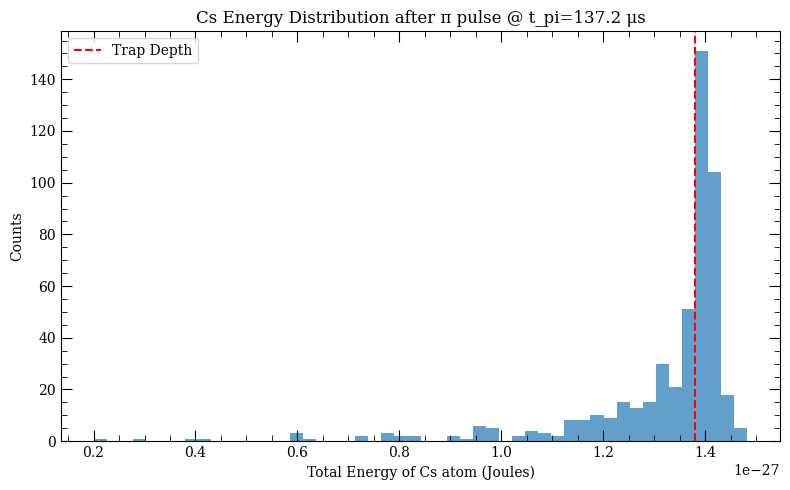

Starting detuning scan...
time for (A) with interaction: 0.3 s


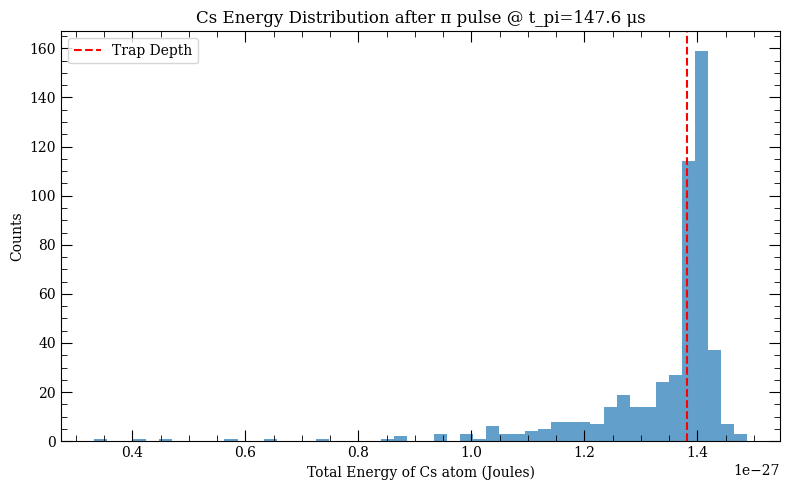

Starting detuning scan...
time for (A) with interaction: 0.3 s


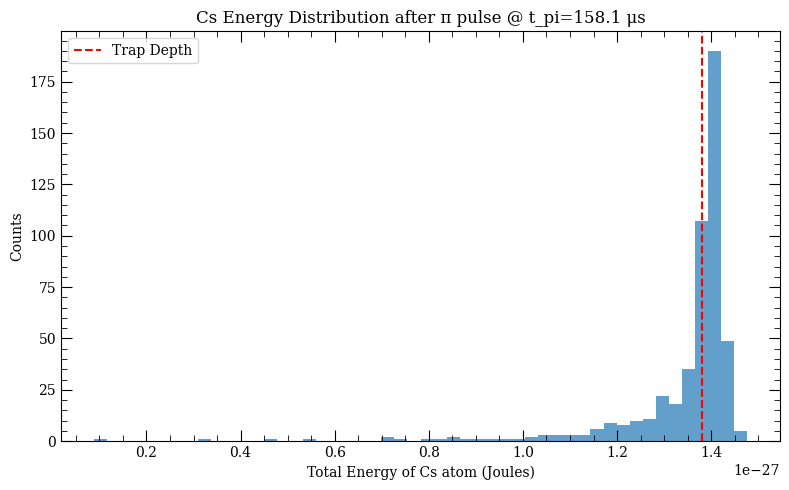

Starting detuning scan...
time for (A) with interaction: 0.3 s


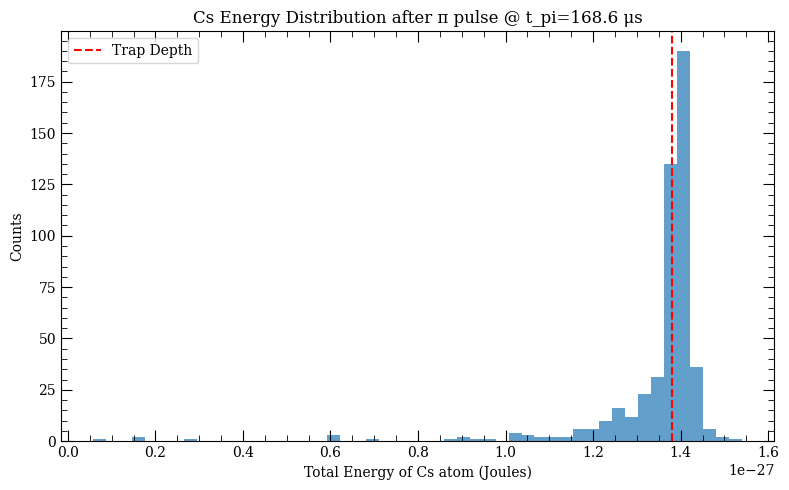

Starting detuning scan...
time for (A) with interaction: 0.3 s


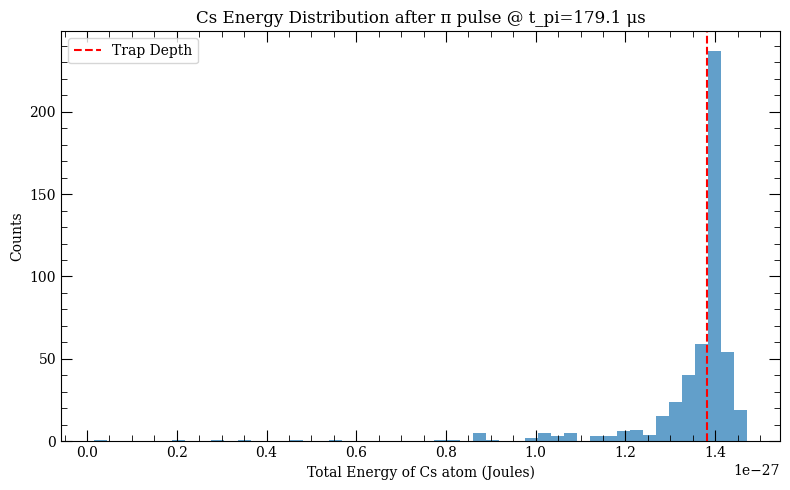

Starting detuning scan...
time for (A) with interaction: 0.3 s


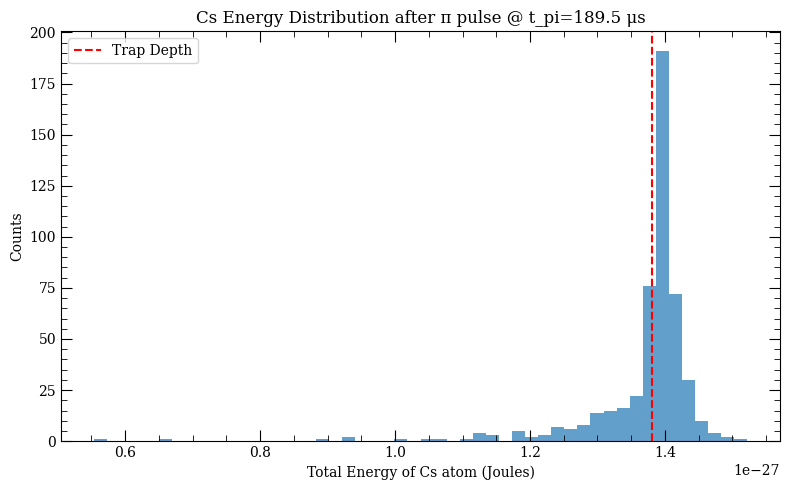

Starting detuning scan...
time for (A) with interaction: 0.2 s


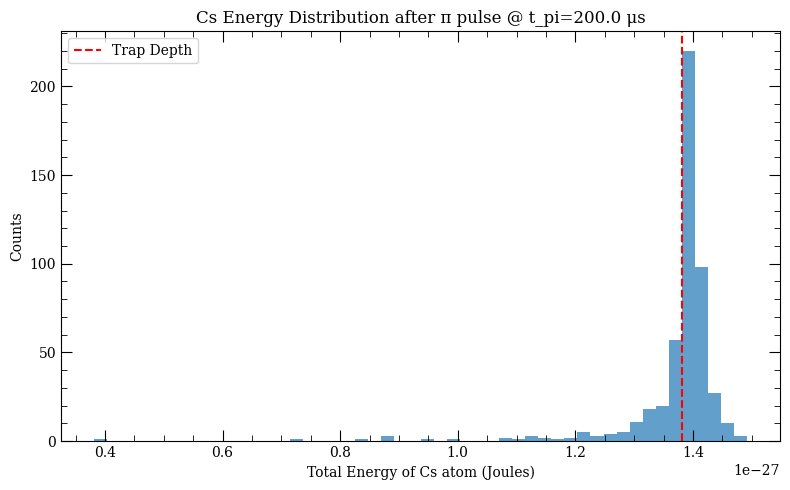

In [26]:
# sweep over pulse times (Rabi frequencies)
pulse_times_us_Cs = np.linspace(1, 200, 20)  # in microseconds
colors = plt.cm.viridis(np.linspace(0, 1, len(pulse_times_us_Cs)))
rabi_freqs_Hz = (np.pi / (2 * (pulse_times_us_Cs * 1e-6)))  # in Hz
pop_array_Cs = []
pos_array_Cs = []
vel_array_Cs = []
for pulse_time, color in zip(pulse_times_us_Cs, colors):
    cfg.t_pi_atom1_us = pulse_time

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

    pop_array_Cs.append(P_int[0])  # only one detuning point

    # plot histogram of potential + kinetic energy of atom 2 (Cs)
    plt.figure(figsize=(8,5))
    ke = np.array([i[0] for i in cfg.energy_array2])
    u = np.array([i[1] for i in cfg.energy_array2])
    pot = np.array([i[2] for i in cfg.energy_array2])[0]
    plt.hist(ke + u, bins=50, alpha=0.7)
    # plot vertical line at trap depth
    plt.axvline(pot, color='r', linestyle='--', label='Trap Depth')
    plt.xlabel("Total Energy of Cs atom (Joules)")
    plt.ylabel("Counts")
    plt.title(f"Cs Energy Distribution after π pulse @ t_pi={pulse_time:.1f} μs")
    plt.legend()
    plt.tight_layout()
    plt.show()

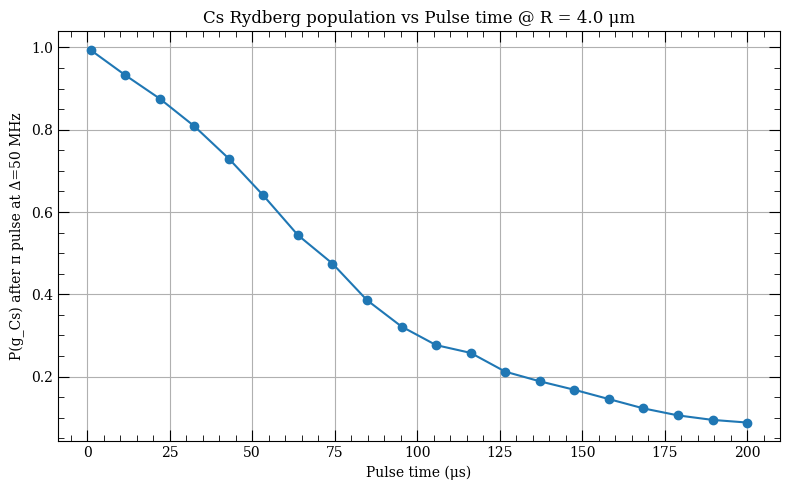

In [14]:
# plot pulse time vs population
plt.figure(figsize=(8,5))
plt.plot(pulse_times_us_Cs, pop_array_Cs, "o-")
plt.xlabel("Pulse time (μs)")
plt.ylabel("P(g_Cs) after π pulse at Δ=50 MHz")
plt.title(f"Cs Rydberg population vs Pulse time @ R = {cfg.R_mean_um:.1f} μm")
# set x-axis to log scale
# plt.xscale("log")
plt.grid()
plt.tight_layout()
plt.show()

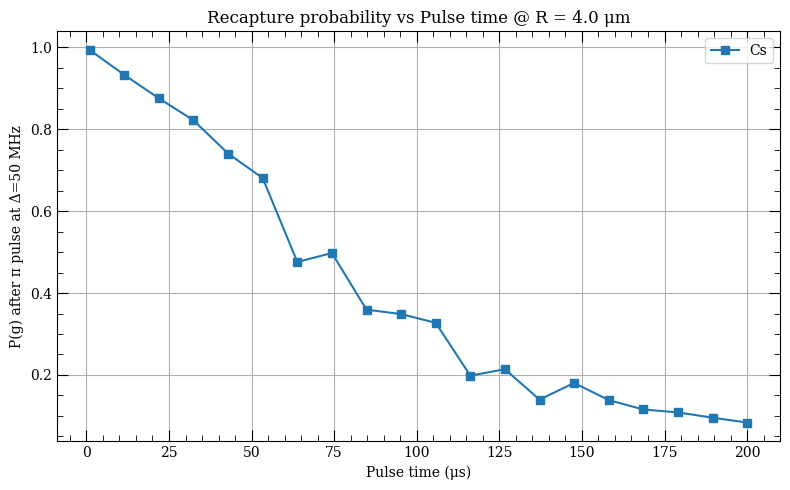

In [ ]:
# plot both Na and Cs populations together
plt.figure(figsize=(8,5))
plt.plot(pulse_times_us_Na, pop_array_Na, "o-", label="Na")
plt.plot(pulse_times_us_Cs, pop_array_Cs, "s-", label="Cs")
plt.xlabel("Pulse time (μs)")
plt.ylabel("P(g) after π pulse at Δ=50 MHz")
plt.title(f"Recapture probability vs Pulse time @ R = {cfg.R_mean_um:.1f} μm")
# set x-axis to log scale
# plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()